In [1]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os
import requests
import base64

# 데이터 전처리 과정에 사용되는 함수 #

# 텍스트(Y / N) 를 0 / 1 값으로 변환시키는 함수
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

# x (input data) / y (labels) 로 데이터 전처리해주는 함수
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(target_type, '__iter__') else target_type
    if target_type in (np.int64, np.int32):
        dummies = pd.get_dummies(df[target])
        return df.as_matrix(result).astype(np.float32), dummies.as_matrix().astype(np.float32)
    else:
        return df.as_matrix(result).astype(np.float32), df.as_matrix([target]).astype(np.float32)



In [76]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

tf.logging.set_verbosity(tf.logging.ERROR)

path = "./data/"

# 데이터 불러오기 
filename = os.path.join(path,"f_7data_BCDE.csv")
df = pd.read_csv(filename,na_values=['NA','?'])

# 텍스트(Y / N) 를 0 / 1 값으로 변환
audit = encode_text_index(df,'audit')
num_classes = len(audit)

# x(입력데이터), y(라벨 값) 데이터 설정
x, y = to_xy(df,'audit')

# train/test set 분할
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.10, random_state=42) 

# 모델 구성
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) #노드 25개로 첫번쨰 hidden layer 쌓음
model.add(Dense(5, activation='hard_sigmoid')) #노드 5개로 두번쨰 hidden layer 쌓음
model.add(Dense(y.shape[1],activation='softmax')) # label의 크기만큼 output layer 쌓음
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #loss, optimizer, metrics 설정
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=50, verbose=1, mode='auto') #EarlyStopping 기능 (50 epoch 까지는 무조건 학습 진행)
hist = model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000, batch_size=10)
#train 데이터로 학습시킨 후 test 데이터와 예측값을 비교해 가중치 조정해줌

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=10)
#loss와 metrics 계산
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 정확도 예측
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_compare = np.argmax(y_test,axis=1)
score = metrics.accuracy_score(y_compare, pred)
print("Final accuracy: {}".format(score))

Train on 89 samples, validate on 10 samples
Epoch 1/1000
 - 10s - loss: 0.6623 - acc: 0.6404 - val_loss: 0.6095 - val_acc: 0.7000
Epoch 2/1000
 - 0s - loss: 0.6588 - acc: 0.6404 - val_loss: 0.6093 - val_acc: 0.7000
Epoch 3/1000
 - 0s - loss: 0.6575 - acc: 0.6404 - val_loss: 0.6082 - val_acc: 0.7000
Epoch 4/1000
 - 0s - loss: 0.6548 - acc: 0.6404 - val_loss: 0.6080 - val_acc: 0.7000
Epoch 5/1000
 - 0s - loss: 0.6543 - acc: 0.6404 - val_loss: 0.6082 - val_acc: 0.7000
Epoch 6/1000
 - 0s - loss: 0.6543 - acc: 0.6404 - val_loss: 0.6072 - val_acc: 0.7000
Epoch 7/1000
 - 0s - loss: 0.6531 - acc: 0.6404 - val_loss: 0.6072 - val_acc: 0.7000
Epoch 8/1000
 - 0s - loss: 0.6522 - acc: 0.6404 - val_loss: 0.6070 - val_acc: 0.7000
Epoch 9/1000
 - 0s - loss: 0.6525 - acc: 0.6404 - val_loss: 0.6067 - val_acc: 0.7000
Epoch 10/1000
 - 0s - loss: 0.6511 - acc: 0.6404 - val_loss: 0.6074 - val_acc: 0.7000
Epoch 11/1000
 - 0s - loss: 0.6513 - acc: 0.6404 - val_loss: 0.6072 - val_acc: 0.7000
Epoch 12/1000
 - 0

Epoch 96/1000
 - 0s - loss: 0.5848 - acc: 0.6629 - val_loss: 0.6004 - val_acc: 0.7000
Epoch 97/1000
 - 0s - loss: 0.5846 - acc: 0.6629 - val_loss: 0.6003 - val_acc: 0.7000
Epoch 98/1000
 - 0s - loss: 0.5794 - acc: 0.6629 - val_loss: 0.5809 - val_acc: 0.7000
Epoch 99/1000
 - 0s - loss: 0.5756 - acc: 0.6629 - val_loss: 0.5711 - val_acc: 0.7000
Epoch 100/1000
 - 0s - loss: 0.5849 - acc: 0.6629 - val_loss: 0.5600 - val_acc: 0.7000
Epoch 101/1000
 - 0s - loss: 0.5768 - acc: 0.6629 - val_loss: 0.5775 - val_acc: 0.7000
Epoch 102/1000
 - 0s - loss: 0.5745 - acc: 0.6629 - val_loss: 0.5802 - val_acc: 0.7000
Epoch 103/1000
 - 0s - loss: 0.5750 - acc: 0.6629 - val_loss: 0.5809 - val_acc: 0.7000
Epoch 104/1000
 - 0s - loss: 0.5707 - acc: 0.6629 - val_loss: 0.5810 - val_acc: 0.7000
Epoch 105/1000
 - 0s - loss: 0.5708 - acc: 0.6629 - val_loss: 0.5698 - val_acc: 0.7000
Epoch 106/1000
 - 0s - loss: 0.5713 - acc: 0.6629 - val_loss: 0.5778 - val_acc: 0.7000
Epoch 107/1000
 - 0s - loss: 0.5655 - acc: 0.66

Epoch 191/1000
 - 0s - loss: 0.4111 - acc: 0.8427 - val_loss: 0.4660 - val_acc: 0.8000
Epoch 192/1000
 - 0s - loss: 0.4112 - acc: 0.8427 - val_loss: 0.4788 - val_acc: 0.8000
Epoch 193/1000
 - 0s - loss: 0.4104 - acc: 0.8427 - val_loss: 0.4637 - val_acc: 0.8000
Epoch 194/1000
 - 0s - loss: 0.4085 - acc: 0.8427 - val_loss: 0.4625 - val_acc: 0.8000
Epoch 195/1000
 - 0s - loss: 0.4078 - acc: 0.8427 - val_loss: 0.4721 - val_acc: 0.8000
Epoch 196/1000
 - 0s - loss: 0.4080 - acc: 0.8427 - val_loss: 0.4699 - val_acc: 0.8000
Epoch 197/1000
 - 0s - loss: 0.4069 - acc: 0.8427 - val_loss: 0.4650 - val_acc: 0.8000
Epoch 198/1000
 - 0s - loss: 0.4067 - acc: 0.8427 - val_loss: 0.4902 - val_acc: 0.7000
Epoch 199/1000
 - 0s - loss: 0.4050 - acc: 0.8427 - val_loss: 0.4585 - val_acc: 0.8000
Epoch 200/1000
 - 0s - loss: 0.4046 - acc: 0.8427 - val_loss: 0.4714 - val_acc: 0.8000
Epoch 201/1000
 - 0s - loss: 0.4037 - acc: 0.8427 - val_loss: 0.4745 - val_acc: 0.8000
Epoch 202/1000
 - 0s - loss: 0.4035 - acc: 

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt

#confusion matrix의 프레임 설정
# cm -> confusion matrix / names -> 각 클래스의 이름
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix
[[6 1]
 [1 2]]
Normalized confusion matrix
[[0.86 0.14]
 [0.33 0.67]]


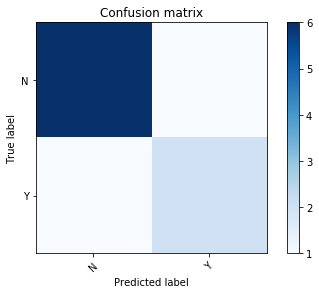

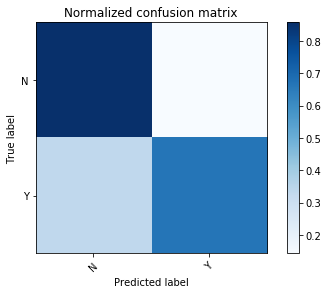

[[ 8.36e+00  1.26e+02  1.35e+00  6.93e+00  3.69e+00  1.19e+02  1.21e+00
   4.84e+00  1.35e+01  8.10e+01  1.25e+00  4.89e+00  1.04e+01  5.37e+01
   1.23e+00  4.88e+00  4.95e+00  6.14e+01  1.16e+00  4.72e+00  5.50e+00
   6.21e+01  1.13e+00  4.78e+00  3.08e+00  5.49e+01  1.07e+00  4.52e+00]
 [ 7.10e-01  3.64e+02  9.60e-01  5.06e+00  1.37e+00  3.94e+02  9.40e-01
   5.05e+00 -6.50e-01  3.98e+02  9.20e-01  5.15e+00  2.10e-01  4.03e+02
   8.40e-01  5.22e+00  1.30e-01  3.57e+02  6.00e-01  4.42e+00 -2.03e+00
   3.76e+02  5.20e-01  4.59e+00 -2.80e+00  4.08e+02  5.80e-01  4.50e+00]
 [ 3.16e+00  9.48e+01  1.05e+00  1.42e+01  4.52e+00  1.68e+02  1.05e+00
   2.55e+01  3.40e+00  2.04e+02  1.36e+00  2.59e+01  3.98e+00  1.83e+02
   1.51e+00  1.22e+01  1.82e+00  1.32e+02  1.18e+00  9.40e+00  3.75e+00
   1.62e+02  1.47e+00  1.26e+01  1.76e+00  1.64e+02  1.13e+00  8.13e+00]
 [-3.13e+01  1.49e+03  1.09e+00  5.27e+00 -7.04e+01  0.00e+00  8.40e-01
   4.12e+00  2.14e+01  2.61e+02  7.80e-01  4.62e+00 -1.90e+01

In [78]:
import numpy as np
from sklearn.metrics import confusion_matrix
 
# 예측한 label을 실제 label과 숫자로 비교한 confusion matrix
cm = confusion_matrix(y_compare, pred)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm, audit)

# 예측한 label을 실제 label과 확률로 비교한 confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, audit, title='Normalized confusion matrix')

plt.show()
print(x_test)
print(y_test)
print(pred)

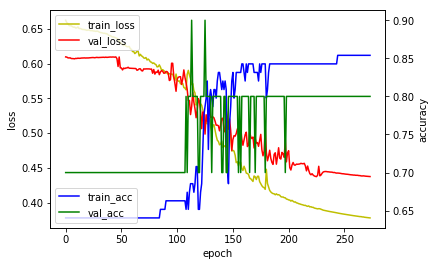

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt

# epoch 증가에 따른 accuracy와 loss 크기의 변화 추이 확인
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')

acc_ax.plot(hist.history['acc'], 'b', label='train_acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val_acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()